<a href="https://colab.research.google.com/github/bryaanabraham/spam_text_recognition_model/blob/main/SpamTextDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('spam.csv', encoding='latin1') #we use encoding as the dataset contains charectors which cannot be interpreted

In [69]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [71]:
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True) #inplace is set to true as its a permanent operation

In [72]:
df.sample(10)

,v1,v2
2890,ham,"Yeah there's quite a bit left, I'll swing by t..."
2073,spam,FreeMsg: Claim ur 250 SMS messages-Text OK to ...
2965,ham,"Are you being good, baby? :)"
3080,ham,Have a great trip to India. And bring the ligh...
360,ham,Ha ha cool cool chikku chikku:-):-DB-)
3956,ham,Where is that one day training:-)
3070,ham,Apart from the one i told you about yesterday?
2916,ham,Yes. that will be fine. Love you. Be safe.
5485,ham,Also fuck you and your family for going to rho...
4234,spam,FREEMSG: Our records indicate you may be entit...


In [73]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)#inplace is set to true as its a permanent operation
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
#Enumerating target values

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [75]:
df['target'] = encoder.fit_transform(df['target'])

In [76]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [77]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [78]:
df.duplicated().sum()

403

In [79]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [80]:
df.shape

(5169, 2)

##Exploratory Data Analysis (EDA)

In [81]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

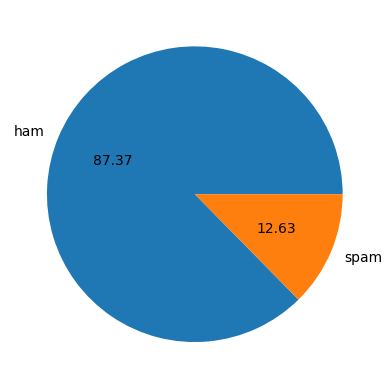

In [82]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [83]:
#Natural language toolkit library
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
df['num_characters'] = df['text'].apply(len)

In [85]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [86]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [87]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [88]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [89]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [90]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [91]:
#ham texts
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [92]:
#spam texts
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [93]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

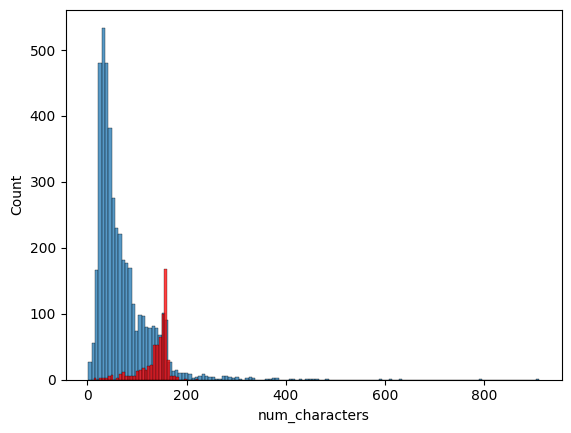

In [94]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

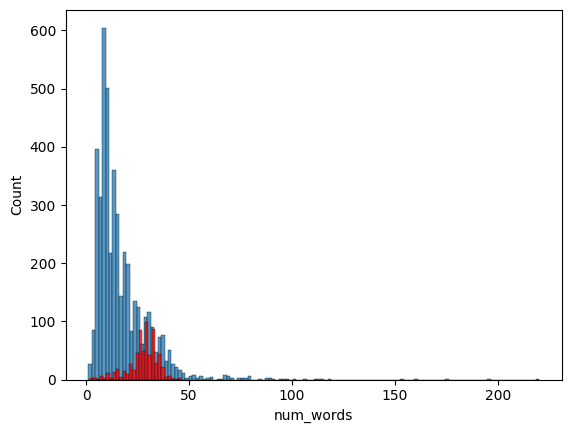

In [95]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

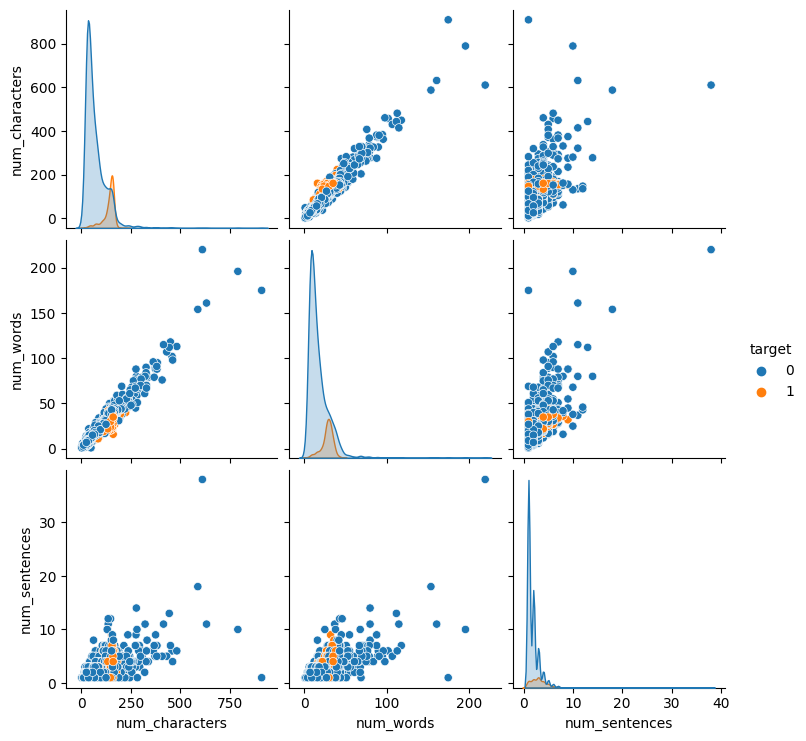

In [96]:
#visualising relations between attributes
sns.pairplot(df,hue='target')

<ipython-input-100-87e13218eecd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

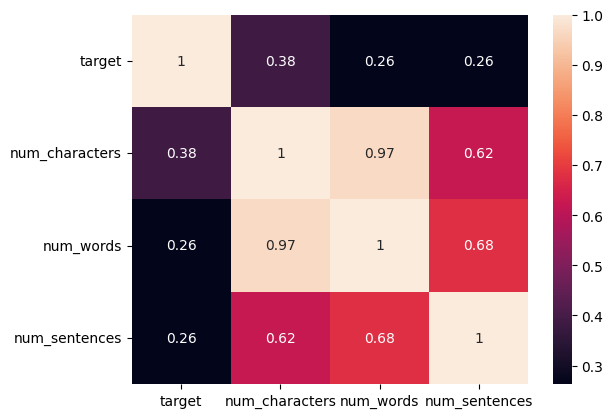

In [100]:
#heat map of CORRelation between attributes with ANNOTations shown
sns.heatmap(df.corr(),annot=True)

###Text Preprocessing

In [120]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
def transform_text(text):
  text = text.lower() #converting all chars to lower case
  text = nltk.word_tokenize(text) #converting the text (single string) to a list of strings containing individual words

  #discarding all special characters
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  #discarding all stopwords and punctuation characters
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  #reducing all words to their root form
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y) #converted to one string

In [126]:
transform_text(df['text'][0])

'go jurong point crazy available bugis n great world la e buffet cine got amore wat go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat'

In [127]:
df['transformed_text'] = df['text'].apply(transform_text)

In [128]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah i d...


In [135]:
!pip install wordcloud

In [146]:
#to identify the most used words and show them pictorally
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [149]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

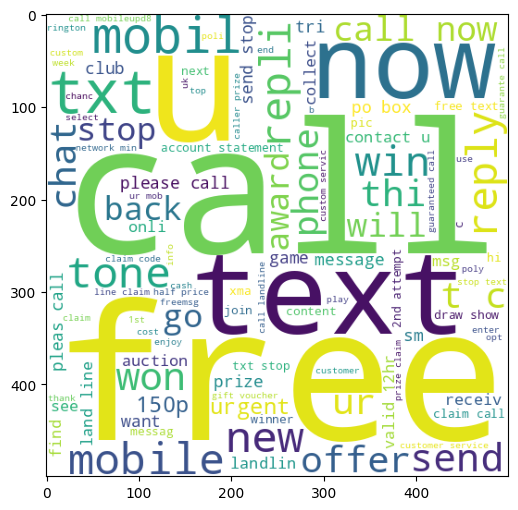

In [150]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [151]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

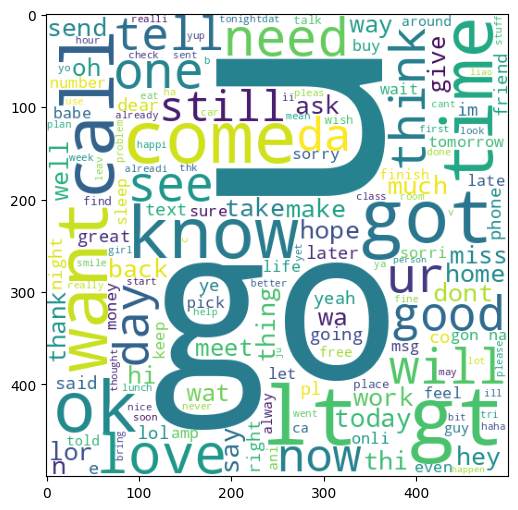

In [152]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [154]:
spam_corpus = []

for i in df[df['target']==1]['transformed_text'].tolist():
  for word in i.split():
    spam_corpus.append(word)

In [155]:
from collections import Counter

In [157]:
Counter(spam_corpus).most_common(30)

[('call', 622),
 ('to', 595),
 ('free', 382),
 ('a', 330),
 ('2', 310),
 ('txt', 271),
 ('you', 267),
 ('your', 252),
 ('u', 238),
 ('ur', 238),
 ('text', 226),
 ('stop', 208),
 ('claim', 194),
 ('4', 194),
 ('for', 183),
 ('the', 183),
 ('now', 164),
 ('prize', 163),
 ('or', 157),
 ('is', 144),
 ('get', 144),
 ('new', 128),
 ('from', 122),
 ('on', 121),
 ('send', 118),
 ('have', 116),
 ('mobil', 114),
 ('urgent', 114),
 ('nokia', 111),
 ('contact', 107)]

In [158]:
ham_corpus = []

for i in df[df['target']==1]['transformed_text'].tolist():
  for word in i.split():
    ham_corpus.append(word)

In [159]:
Counter(ham_corpus).most_common(30)

[('call', 622),
 ('to', 595),
 ('free', 382),
 ('a', 330),
 ('2', 310),
 ('txt', 271),
 ('you', 267),
 ('your', 252),
 ('u', 238),
 ('ur', 238),
 ('text', 226),
 ('stop', 208),
 ('claim', 194),
 ('4', 194),
 ('for', 183),
 ('the', 183),
 ('now', 164),
 ('prize', 163),
 ('or', 157),
 ('is', 144),
 ('get', 144),
 ('new', 128),
 ('from', 122),
 ('on', 121),
 ('send', 118),
 ('have', 116),
 ('mobil', 114),
 ('urgent', 114),
 ('nokia', 111),
 ('contact', 107)]

##Naive Bayes
Naive Bayes is generally used for text based models